In [2]:
import pandas as pd

Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond 

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

I have solved EDA step by step

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/geddadasuresh84326/Zip-files/master/gemstone_train.csv")

In [4]:
df.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [7]:
df.shape

(193573, 11)

In [8]:
df.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
8998,8998,0.33,Ideal,H,IF,61.8,54.0,4.45,4.48,2.75,955
187761,187761,1.16,Ideal,H,SI2,61.0,56.0,6.84,6.78,4.16,5027
102494,102494,1.01,Very Good,E,VS1,61.9,59.0,6.41,6.37,3.96,8415
169190,169190,0.70,Ideal,H,VS1,60.6,57.0,5.73,5.78,3.50,2604
104269,104269,1.23,Premium,I,SI2,60.8,60.0,6.91,6.89,4.20,4854
51074,51074,0.63,Premium,I,VS2,61.4,62.0,5.46,5.50,3.38,1408
38937,38937,1.01,Very Good,F,SI1,63.0,59.0,6.37,6.34,4.00,4365
177483,177483,0.70,Ideal,E,SI1,61.5,56.0,5.71,5.73,3.52,2528
96663,96663,0.70,Ideal,D,VS2,62.7,57.0,5.69,5.60,3.54,3354
160769,160769,0.34,Ideal,I,VVS1,62.0,56.0,4.48,4.45,2.77,765


In [9]:
df.size

2129303

In [10]:
# checking null values
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### removing "id" column as it is not required for our analysis


In [11]:
df.drop("id",axis=1,inplace=True)

In [12]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

### checking duplicates


In [13]:
df.duplicated().sum()

0

### segregating the data based on datatypes


In [14]:
cat_columns = df.columns[df.dtypes=="object"]

In [15]:
cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [16]:
num_columns = df.columns[df.dtypes!="object"]

In [17]:
num_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [18]:
# Numerical data 
df[num_columns]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [19]:
df[cat_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [20]:
for col in cat_columns:
    print(df[col].value_counts())
    print(f"count of categories : {len(df[col].value_counts())}")
    print("--------------------------------------")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
count of categories : 5
--------------------------------------
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
count of categories : 7
--------------------------------------
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
count of categories : 8
--------------------------------------


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


<Figure size 600x400 with 0 Axes>

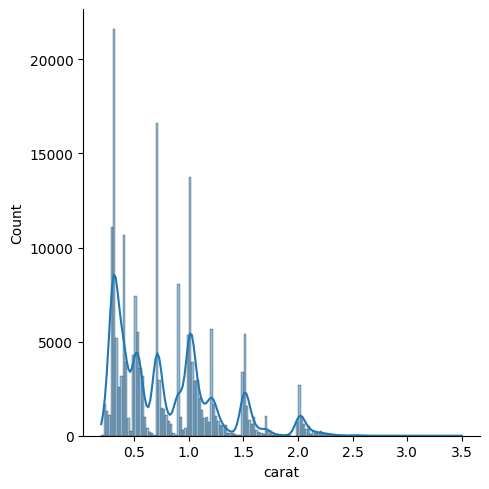

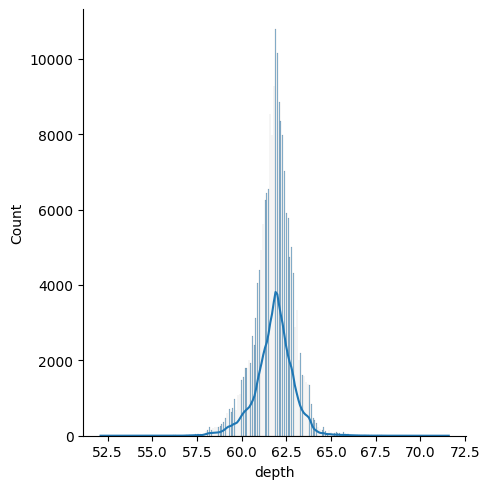

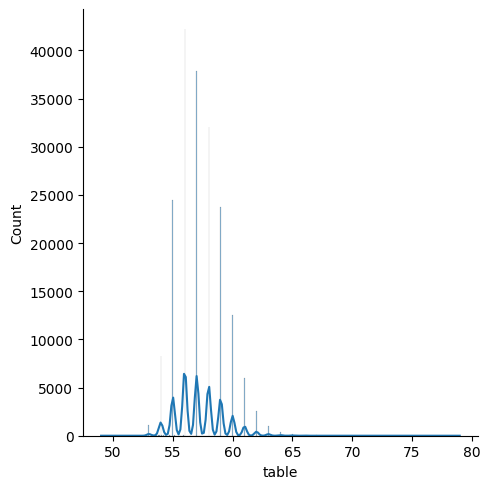

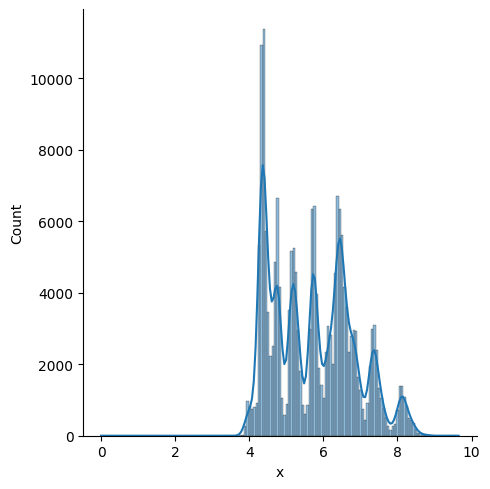

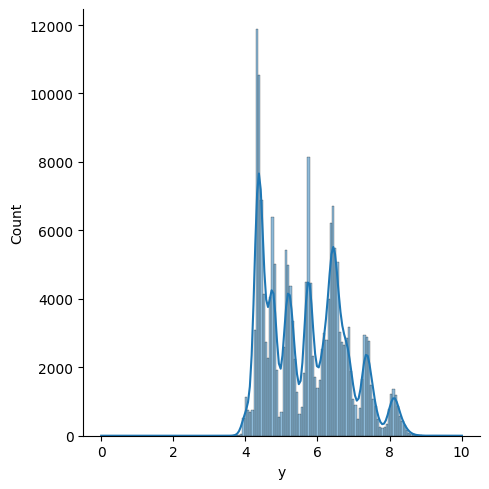

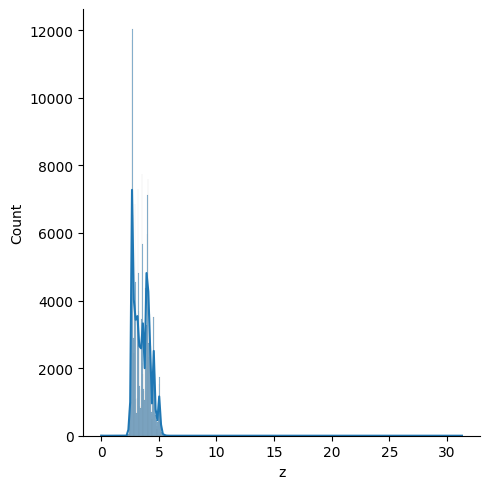

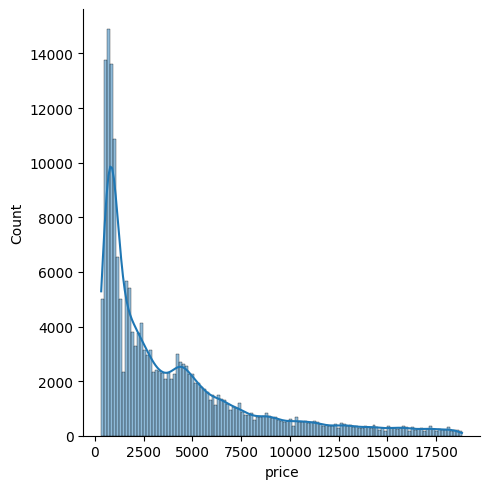

In [22]:
plt.figure(figsize=(6,4))

for col in num_columns:
    sns.displot(data=df,x=col,kde=True)
    print("\n")

<Axes: >

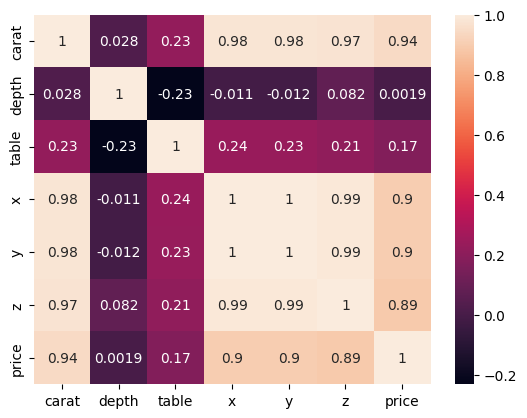

In [23]:
sns.heatmap(df[num_columns].corr(),annot=True)

### performing oridinal encoding

# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']

color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [24]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [26]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [27]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681
